In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 128
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=30


In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/tomato_train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 18375 files belonging to 10 classes.


In [ ]:
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/tomato_valid",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4585 files belonging to 10 classes.


In [ ]:
tf.__version__

'2.12.0'

In [ ]:
train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = valid_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (128, 256, 256, 3)        0         
                                                                 
 conv2d (Conv2D)             (128, 254, 254, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (128, 127, 127, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (128, 125, 125, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (128, 62, 62, 64)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (128, 60, 60, 64)        

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=valid_dataset,
    verbose=1,
    epochs=50,
)

Epoch 1/50
144/144 [==============================] - 3064s 20s/step - loss: 1.7922 - accuracy: 0.3388 - val_loss: 1.5243 - val_accuracy: 0.4711
Epoch 2/50
144/144 [==============================] - 216s 1s/step - loss: 1.1125 - accuracy: 0.6072 - val_loss: 1.0019 - val_accuracy: 0.6700
Epoch 3/50
144/144 [==============================] - 222s 2s/step - loss: 0.9000 - accuracy: 0.6848 - val_loss: 0.7563 - val_accuracy: 0.7431
Epoch 4/50
144/144 [==============================] - 224s 2s/step - loss: 0.7744 - accuracy: 0.7297 - val_loss: 1.2951 - val_accuracy: 0.6473
Epoch 5/50
144/144 [==============================] - 219s 2s/step - loss: 0.6895 - accuracy: 0.7655 - val_loss: 0.5846 - val_accuracy: 0.7847
Epoch 6/50
144/144 [==============================] - 217s 1s/step - loss: 0.6210 - accuracy: 0.7831 - val_loss: 1.6454 - val_accuracy: 0.6373
Epoch 7/50
144/144 [==============================] - 221s 2s/step - loss: 0.5692 - accuracy: 0.8008 - val_loss: 0.5264 - val_accuracy: 0.82

In [ ]:
train_loss, train_acc = model.evaluate(train_dataset)
print('Training accuracy:', train_acc)

144/144 [==============================] - 209s 1s/step - loss: 0.1276 - accuracy: 0.9584
Training accuracy: 0.9583673477172852


In [ ]:
val_loss, val_acc = model.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)

36/36 [==============================] - 10s 245ms/step - loss: 0.3030 - accuracy: 0.9027
Validation accuracy: 0.9027262926101685


In [ ]:
model.save('trained_model.h5')

NameError: ignored

In [ ]:
history.history

{'loss': [1.8808009624481201,
  1.3068000078201294,
  1.0631358623504639,
  0.9391747713088989,
  0.8324204087257385,
  0.7981466054916382,
  0.7139845490455627,
  0.6744703650474548,
  0.6084268093109131,
  0.5931297540664673,
  0.556068480014801,
  0.5156498551368713,
  0.5260806679725647,
  0.47004804015159607,
  0.4490504860877991,
  0.44546160101890564,
  0.4248494803905487,
  0.4099735915660858,
  0.3850342929363251,
  0.3820283114910126,
  0.36655372381210327,
  0.3666304349899292,
  0.3223091661930084,
  0.35823607444763184,
  0.34146571159362793,
  0.327997624874115,
  0.3173251152038574,
  0.2911044955253601,
  0.2821018695831299,
  0.28310051560401917],
 'accuracy': [0.28903400897979736,
  0.5332244634628296,
  0.6190476417541504,
  0.6586122512817383,
  0.7041632533073425,
  0.7140680551528931,
  0.743238091468811,
  0.7622857093811035,
  0.7832925319671631,
  0.784816324710846,
  0.7982040643692017,
  0.814530611038208,
  0.8152381181716919,
  0.8334149718284607,
  0.83771

In [ ]:
import json
with open('training_hist.json','w') as f:
  json.dump(history.history,f)

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
print("Validation set Accuracy: {} %".format(history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 90.27262926101685 %


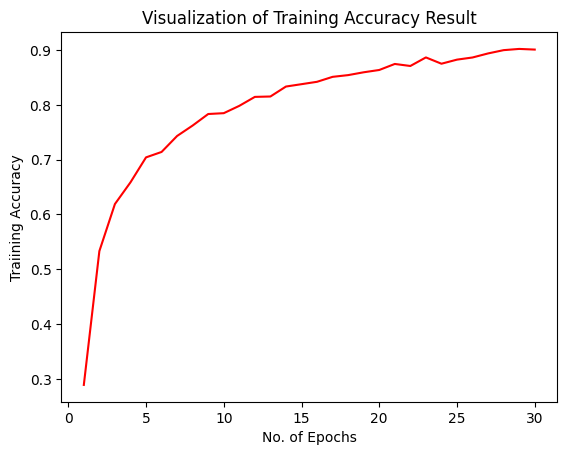

In [ ]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

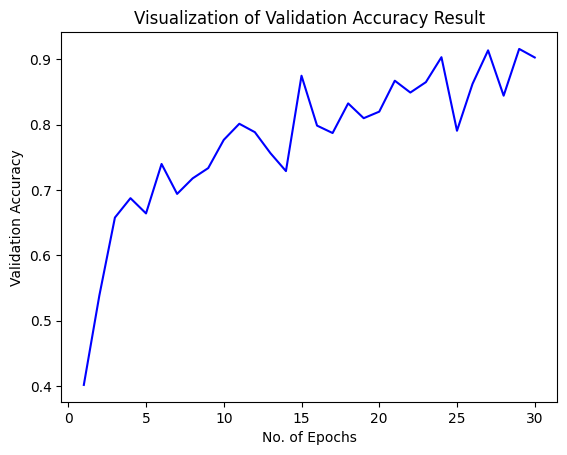

In [ ]:
plt.plot(epochs,history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

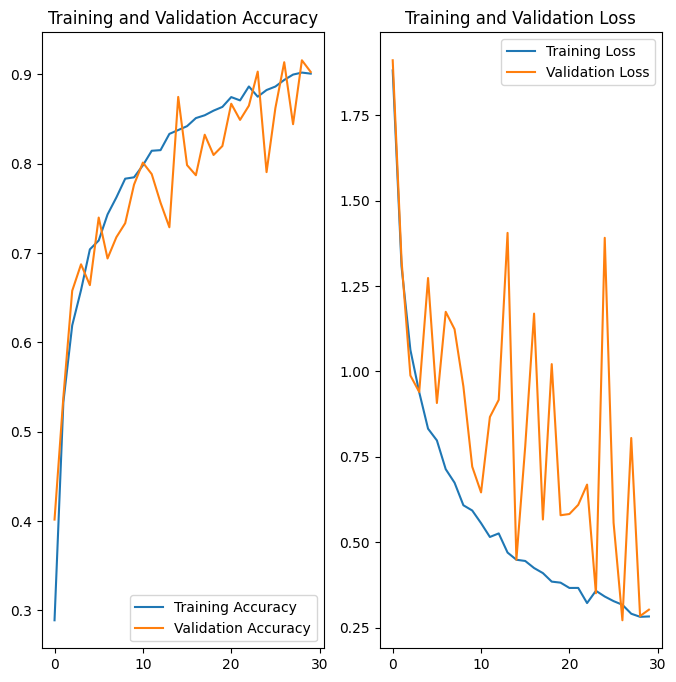

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/TEST_TOMATO",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 23 files belonging to 10 classes.


In [ ]:
test_loss,test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

1/1 [==============================] - 3s 3s/step - loss: 0.4921 - accuracy: 0.9130
Test accuracy: 0.9130434989929199
